# Getting Started

In [55]:
import requests
import torch
from PIL import Image
from tqdm import tqdm
from datasetsIc import CaptionDataset
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer,GPT2Tokenizer, GPT2TokenizerFast, VisionEncoderDecoderModel, AutoImageProcessor, GPT2LMHeadModel, GPT2Config
data_folder = r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\media\output\Test1'
data_name = 'fscocoSyn_1_cap_per_img_1_min_word_freq'
batch_size = 8
workers = 0
num_epochs = 1 # number of epochs
batch_size = 8 # the size of batches
from torch.utils.tensorboard import SummaryWriter
from transformers import EvalPrediction
from torch.optim import AdamW
import evaluate
from torch.utils.tensorboard import SummaryWriter
from torch.optim import AdamW
from transformers import EvalPrediction
import urllib.parse as parse
import os
from IPython.display import display
from utils import *

In [60]:
print(os.getcwd())

C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\media\output\Test1


In [84]:
from transformers import GPT2LMHeadModel

modelFineTuned_1 = GPT2LMHeadModel.from_pretrained("priyasaravana/modelGPTlm")

In [82]:
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("priyasaravana/tokenGPT_token")

In [78]:
encoder_model = "microsoft/swin-base-patch4-window7-224-in22k"
# the decoder model that process the image features and generate the caption text
# decoder_model = "bert-base-uncased"
# decoder_model = "prajjwal1/bert-tiny"
decoder_model = model

# tokenizer = BertTokenizerFast.from_pretrained(decoder_model)
#model_path = r'C:\Users\Asus\Downloads\LM'
#model_path = os.path.join(os.getcwd(), 'model\LM')
#tokenizer = GPT2TokenizerFast.from_pretrained(model_path)
#tokenizer = GPT2Tokenizer.from_pretrained(model_path)



In [ ]:
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
        encoder_model, modelFineTuned_1
    ).to(device)

In [79]:
#configuration = GPT2Config()
# Initializing a model (with random weights) from the configuration

#configuration = GPT2Config.from_pretrained(model_path, output_hidden_states=False)
#decoder_model = GPT2LMHeadModel.from_pretrained(model_path, config=configuration, local_files_only=True)
# load the image processor
image_processor = ViTImageProcessor.from_pretrained(encoder_model)
#image_processor = AutoImageProcessor.from_pretrained(encoder_model)
# Fine-tuning your Own Image Captioning Model

Some weights of the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


OSError: Can't load the configuration of 'GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50259, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50259, bias=False)
)'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50259, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50259, bias=False)
)' is the correct path to a directory containing a config.json file

In [23]:
import os
import csv
from tqdm import tqdm
# Path to the folder containing text files
image_folder = r"C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions"

# List to store the content of each text file
file_contents = []
image_ref_fold_no = list(os.listdir(image_folder))
for image_folder_no in tqdm(image_ref_fold_no):
    # print(f"Loading Action: {action}")
    
    image_path = os.path.join(image_folder, image_folder_no)
    for filename in os.listdir(image_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(image_folder, image_folder_no, filename)
            print(file_path)
            try:
                with open(file_path) as f:
                    captions = f.read()
                file_contents.append(captions)
            except Exception as e:
                print(f"Error processing file '{file_path}': {str(e)}")


csv_file_path =os.path.join(folder_path, "output.csv")

with open(csv_file_path, "w", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.writer(csv_file)
    for content in file_contents:
        csv_writer.writerow([content])

print("Content from text files has been written to the CSV file.")


100%|██████████| 2/2 [00:00<00:00, 87.36it/s]

C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions\1\000000006336.txt
C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions\1\000000011667.txt
C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions\1\000000018312.txt
C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions\1\000000025625.txt
C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Capt

In [27]:
file_contents_ms = []
coco_annotation_path = r'mscoco\\captions_train2017.json'
folder_path = r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\media'
with open(coco_annotation_path, 'r') as f:
    data = json.load(f)
    data = data['annotations']

i = 0
for itmData in data:
    if i < 20000: 
        caption = itmData['caption']
        file_contents_ms.append(caption)
    else:
        break
    i+=1

csv_file_path =os.path.join(folder_path, "output-mscoco.csv")

with open(csv_file_path, "w", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.writer(csv_file)
    for content in file_contents_ms:
        csv_writer.writerow([content])

print("Content from text files has been written to the CSV file.")

Content from text files has been written to the CSV file.


In [21]:
len(file_contents)

201

In [22]:
import json
json_file_path = r"C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions\data.json"
with open(json_file_path, 'w') as json_file:
    json.dump(file_contents, json_file, indent=4)

In [54]:
from os.path import dirname
dirname(__file__)

NameError: name '__file__' is not defined

In [52]:
print(os.path.join(os.getcwd()))

C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\media\output\Test1


In [53]:
coco_annotation_path = r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\mscoco\captions_train2017.json'
with open(coco_annotation_path, 'r') as f:
        data = json.load(f)
        data = data['annotations']

In [ ]:
for itmData in data:
    #i =0
    img_name = '%012d.jpg' % itmData['image_id']
    img_name = os.path.join(coco_basePath, img_name)
    caption = itmData['caption']
    tokens = word_tokenize(captions)
    word_freq.update(tokens)

In [25]:
TRAIN_BATCH_SIZE = 20   # input batch size for training (default: 64)
VALID_BATCH_SIZE = 5   # input batch size for testing (default: 1000)
VAL_EPOCHS = 1 
LEARNING_RATE = 1e-4    # learning rate (default: 0.01)
SEED = 42               # random seed (default: 42)
MAX_LEN = 128           # Max length for Input description

TRAIN_EPOCHS = 2       # number of epochs to train (default: 5)
WEIGHT_DECAY = 0.01
SEED = 42               # random seed (default: 42)
SUMMARY_LEN = 20   # Maximum length of caption generated 

In [26]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [34]:
import os
import json
import pandas as pd
# LOCATION OF JSON AND IMAGES
os.chdir(r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\media\output\Test1') 
# CONVERTING TO DICTIONARY
with open('WORDMAP_fscocoSyn_1_cap_per_img_1_min_word_freq.json', 'r') as openfile:
    json_object = json.load(openfile)

images_caption_dict = dict(json_object)

In [32]:
images_caption_dict

{}

In [30]:
images_path = r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoSyn\1'
images = list(images_caption_dict.keys())
# PREPENDING IMAGE PATHS TO THE IMAGE FILE NAMES
for image_path in images:
    if image_path.endswith('jpg'):
        new = images_path + image_path.split('/')[-1]
        images_caption_dict[new] = images_caption_dict.pop(image_path)
    else:
        images_caption_dict.pop(image_path)

In [35]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import Trainer, TrainingArguments

In [36]:
def load_dataset(file_path, tokenizer, block_size = 128):
    dataset = TextDataset(
        tokenizer = tokenizer,
        file_path = file_path,
        block_size = block_size,
    )
    return dataset


def load_data_collator(tokenizer, mlm = False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, 
        mlm=mlm,
    )
    return data_collator

In [38]:
def train(train_file_path,model_name,
                output_dir,
                overwrite_output_dir,
                per_device_train_batch_size,
                num_train_epochs,
                save_steps):
        tokenizer = GPT2Tokenizer.from_pretrained(model_name)
        train_dataset = load_dataset(train_file_path, tokenizer)
        data_collator = load_data_collator(tokenizer)

        tokenizer.save_pretrained(output_dir)

        model = GPT2LMHeadModel.from_pretrained(model_name)

        model.save_pretrained(output_dir)

        training_args = TrainingArguments(
                output_dir=output_dir,
                overwrite_output_dir=overwrite_output_dir,
                per_device_train_batch_size=per_device_train_batch_size,
                num_train_epochs=num_train_epochs,
        )

        trainer = Trainer(
                model=model,
                args=training_args,
                data_collator=data_collator,
                train_dataset=train_dataset,
        )

        trainer.train()
        trainer.save_model()

In [41]:
# you need to set parameters 
train_file_path = r"C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions\1\000000006336.txt"
model_name = 'gpt2'
output_dir = r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions\1'
overwrite_output_dir = False
per_device_train_batch_size = 8
num_train_epochs = 5.0
save_steps = 500

In [43]:
from torch import mps

ImportError: cannot import name 'mps' from 'torch' (C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\torch\__init__.py)

In [44]:

train(
    train_file_path=train_file_path,
    model_name=model_name,
    output_dir=output_dir,
    overwrite_output_dir=overwrite_output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    num_train_epochs=num_train_epochs,
    save_steps=save_steps
)

c:\Python39\lib\site-packages\transformers\data\datasets\language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


ModuleNotFoundError: No module named 'torch.mps'

In [ ]:
!pip install torch transformers rouge_score evaluate datasets

In [94]:
import requests
import torch
from PIL import Image
from tqdm import tqdm
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

In [93]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer, GPT2TokenizerFast, VisionEncoderDecoderModel, GPT2TokenizerFast

# Using a Trained Model

In [95]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [96]:
import urllib.parse as parse
import os

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False
    
# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)
        

# a function to perform inference
def get_caption(model, image_processor, tokenizer, image_path):
    
    image = load_image(image_path)
    # preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = model.generate(**img)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

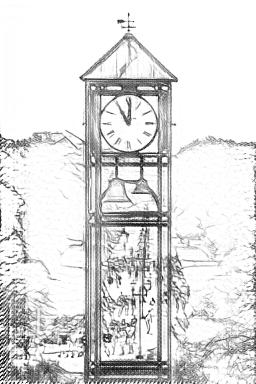

a clock tower with a clock on it's side 


In [97]:
# load displayer
from IPython.display import display
image_path = r'C:\Users\Asus\Desktop\Images\Caroline.jpg'

display(load_image(image_path))
caption = get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, image_path)
print(caption)

# Fine-tuning your Own Image Captioning Model

## Loading the Model

In [4]:
# the encoder model that process the image and return the image features
# encoder_model = "WinKawaks/vit-small-patch16-224"
# encoder_model = "google/vit-base-patch16-224"
# encoder_model = "google/vit-base-patch16-224-in21k"
encoder_model = "microsoft/swin-base-patch4-window7-224-in22k"
# the decoder model that process the image features and generate the caption text
# decoder_model = "bert-base-uncased"
# decoder_model = "prajjwal1/bert-tiny"
decoder_model = "gpt2"
# load the model
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_model, decoder_model
).to(device)

Some weights of the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.5.crossattention.c_proj.weight', 'h.8.ln_cross_attn.weight', 'h.9.crossattention.c_proj.weight', 'h.5.ln_cross_attn.weight', 'h.6.crossattention.c_attn.weight', 'h.11.crossattention.q_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.3.crossattention.c_attn.w

In [5]:
# initialize the tokenizer
# tokenizer = AutoTokenizer.from_pretrained(decoder_model)
tokenizer = GPT2TokenizerFast.from_pretrained(decoder_model)
# tokenizer = BertTokenizerFast.from_pretrained(decoder_model)
# load the image processor
image_processor = ViTImageProcessor.from_pretrained(encoder_model)

In [6]:
if "gpt2" in decoder_model:
  # gpt2 does not have decoder_start_token_id and pad_token_id
  # but has bos_token_id and eos_token_id
  tokenizer.pad_token = tokenizer.eos_token # pad_token_id as eos_token_id
  model.config.eos_token_id = tokenizer.eos_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  # set decoder_start_token_id as bos_token_id
  model.config.decoder_start_token_id = tokenizer.bos_token_id
else:
  # set the decoder start token id to the CLS token id of the tokenizer
  model.config.decoder_start_token_id = tokenizer.cls_token_id
  # set the pad token id to the pad token id of the tokenizer
  model.config.pad_token_id = tokenizer.pad_token_id

## Downloading & Loading the Dataset

In [14]:
from datasets import load_dataset

In [ ]:
max_length = 32 # max length of the captions in tokens
coco_dataset_ratio = 1 # 50% of the COCO2014 dataset
train_ds = load_dataset("HuggingFaceM4/COCO", split=f"train[:{coco_dataset_ratio}%]")
valid_ds = load_dataset("HuggingFaceM4/COCO", split=f"validation[:{coco_dataset_ratio}%]")
test_ds = load_dataset("HuggingFaceM4/COCO", split=f"test[:{coco_dataset_ratio}%]")
len(train_ds), len(valid_ds), len(test_ds)

In [7]:
from datasetsIc import CaptionDataset
data_folder = r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\media\output\Test'
data_name = 'fscocoSyn_1_cap_per_img_1_min_word_freq'
batch_size = 10
workers = 0

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
train_loader = torch.utils.data.DataLoader(
    CaptionDataset(data_folder, data_name, 'TRAIN', transform=transforms.Compose([normalize])),
    batch_size=10, shuffle=True, num_workers=workers, pin_memory=True)
val_loader = torch.utils.data.DataLoader(
    CaptionDataset(data_folder, data_name, 'VAL', transform=transforms.Compose([normalize])),
    batch_size=1, shuffle=True, num_workers=workers, pin_memory=True)
test_loader = torch.utils.data.DataLoader(
    CaptionDataset(data_folder, data_name, 'TEST', transform=transforms.Compose([normalize])),
    batch_size=1, shuffle=True, num_workers=workers, pin_memory=True)


c:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\datasetsIc.py:68: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.split is 'TRAIN':


9
9


In [17]:
# Use itertools.islice to create a limited iterator with the top 50 records
import itertools
from torch.utils.data import DataLoader
top_50_train_loader = DataLoader(itertools.islice(train_loader, 50),  batch_size=8, shuffle=False)
top_50_val_loader = DataLoader(itertools.islice(val_loader, 50),  batch_size=8, shuffle=False)

## Preprocessing the Inputs

In [17]:
import numpy as np

# remove the images with less than 3 dimensions (possibly grayscale images)
train_ds = train_loader.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)
valid_ds = val_loader.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)
#test_ds = test_ds.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)

AttributeError: 'DataLoader' object has no attribute 'filter'

In [18]:
def preprocess(items):
  # preprocess the image
  pixel_values = image_processor(items["image"], return_tensors="pt").pixel_values.to(device)
  # tokenize the caption with truncation and padding
  targets = tokenizer([ sentence["raw"] for sentence in items["sentences"] ], 
                      max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
  return {'pixel_values': pixel_values, 'labels': targets["input_ids"]}


# using with_transform to preprocess the dataset during training
train_dataset = train_loader.with_transform(preprocess)
valid_dataset = val_loader.with_transform(preprocess)
#test_dataset  = test_ds.with_transform(preprocess)

AttributeError: 'DataLoader' object has no attribute 'with_transform'

In [21]:
# a function we'll use to collate the batches
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.stack([x['labels'] for x in batch])
    }

## Evaluation Metrics

In [99]:
import evaluate

# load the rouge and bleu metrics
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")
  
def compute_metrics(eval_pred):
      preds = eval_pred.label_ids
      labels = eval_pred.predictions
      # decode the predictions and labels
      pred_str = tokenizer.batch_decode(preds, skip_special_tokens=True)
      labels_str = tokenizer.batch_decode(labels, skip_special_tokens=True)
      # compute the rouge score
      rouge_result = rouge.compute(predictions=pred_str, references=labels_str)
      # multiply by 100 to get the same scale as the rouge score
      rouge_result = {k: round(v * 100, 4) for k, v in rouge_result.items()}
      # compute the bleu score
      bleu_result = bleu.compute(predictions=pred_str, references=labels_str)
      # get the length of the generated captions
      generation_length = bleu_result["translation_length"]
      return {
            **rouge_result, 
            "bleu": round(bleu_result["bleu"] * 100, 4), 
            "gen_len": bleu_result["translation_length"] / len(preds)
      }

## Training

In [9]:
num_epochs = 1 # number of epochs
batch_size = 8 # the size of batches

In [14]:
for item in train_dataset:
  print(item["labels"].shape)
  print(item["pixel_values"].shape)
  break

NameError: name 'train_dataset' is not defined

### Using the Trainer Class

In [16]:
# define the training arguments
from transformers import Seq2SeqTrainingArguments
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,             # use generate to calculate the loss
    num_train_epochs=num_epochs,            # number of epochs
    evaluation_strategy="steps",            # evaluate after each eval_steps
    eval_steps=2000,                        # evaluate after each 2000 steps
    logging_steps=2000,                     # log after each 2000 steps
    save_steps=2000,                        # save after each 2000 steps
    per_device_train_batch_size=batch_size, # batch size for training
    per_device_eval_batch_size=batch_size,  # batch size for evaluation
    output_dir="vit-swin-base-224-gpt2-image-captioning", # output directory
    # push_to_hub=True # whether you want to push the model to the hub,
    # check this guide for more details: https://huggingface.co/transformers/model_sharing.html
)

In [22]:
# instantiate trainer
from transformers import Seq2SeqTrainer
trainer = Seq2SeqTrainer(
    model=model,                     # the instantiated 🤗 Transformers model to be trained
    tokenizer=image_processor,       # we use the image processor as the tokenizer
    args=training_args,              # pass the training arguments
    compute_metrics=compute_metrics, # pass the compute metrics function
    train_dataset=train_loader,     # pass the training dataset
    eval_dataset=val_loader,      # pass the validation dataset
    data_collator=collate_fn,        # pass the collate function
)

800


In [26]:
from torch.utils.data import DataLoader

def get_train_loader(train_dataset=None):
    # return DataLoader(valid_dataset, collate_fn=collate_fn, batch_size=batch_size)
    return train_loader

def get_eval_loader(val_dataset=None):
    #return DataLoader(test_dataset, collate_fn=collate_fn, batch_size=batch_size)
    return val_loader

# override the get_train_dataloader, get_eval_dataloader and
# get_test_dataloader methods of the trainer
# so that we can properly load the data
# trainer.get_train_dataloader = lambda: DataLoader(train_dataset, collate_fn=collate_fn, batch_size=batch_size)
# trainer.get_eval_dataloader = get_eval_loader
# trainer.get_test_dataloader = get_test_loader

trainer.get_train_dataloader = get_train_loader
trainer.get_eval_dataloader = get_eval_loader

NameError: name 'trainer' is not defined

In [24]:
# train the model
trainer.train()

800
800
800
800


c:\Python39\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


NotFoundError: Failed to create a directory: vit-swin-base-224-gpt2-image-captioning\runs\Aug22_14-54-22_DESKTOP-KTBMBO2/1692713633.2668586; No such file or directory

In [ ]:
# evaluate on the test_dataset
trainer.evaluate(test_dataset)

In [ ]:
# if you set the push_to_hub parameter in the trainingarguments
# finish the pushing using the below code
trainer.push_to_hub()

In [ ]:
# to free up GPU memory
import gc
# del predictions
# del outputs
# del labels
torch.cuda.empty_cache()
gc.collect()

###Using PyTorch Training Loop

In [ ]:
# alternative way of training: pytorch loop
from torch.utils.data import DataLoader

# define our data loaders
train_dataset_loader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
valid_dataset_loader = DataLoader(valid_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)
test_dataset_loader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)

In [10]:
from torch.optim import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

In [11]:
# Training loop
from torch.utils.tensorboard import SummaryWriter

summary_writer = SummaryWriter(log_dir="./image-captioning/tensorboard")

# print some statistics before training
# number of training steps
n_train_steps = num_epochs * len(train_loader)
# number of validation steps
n_valid_steps = len(val_loader)
# current training step
current_step = 0
# logging, eval & save steps
save_steps = 10
print(n_train_steps, n_valid_steps)

8 9


In [12]:
from transformers import EvalPrediction

In [14]:
current_step = 0
current_step_count = 0
save_steps = 10
for epoch in range(num_epochs):
    # set the model to training mode
    model.train()
    # initialize the training loss
    train_loss = 0
    for batch in tqdm(train_loader, "Training", total=len(train_loader), leave=False):
        #print(current_step, save_steps, current_step % save_steps)
        if current_step % save_steps == 0:
            ### = code ###
            # evaluate on the validation set
            print("Validation at step:", current_step_count)
            # if the current step is a multiple of the save steps
            #print(f"\nValidation at step {current_step}...\n")
            # set the model to evaluation mode
            model.eval()
            # initialize our lists that store the predictions and the labels
            predictions, labels = [], []
            # initialize the validation loss
            valid_loss = 0
            for batch in val_loader:
                # get the batch
                pixel_values = batch[0]
                label_ids = batch[1]
                # forward pass
                outputs = model(pixel_values=pixel_values, labels=label_ids)
                # get the loss
                loss = outputs.loss
                valid_loss += loss.item()
                # free the GPU memory
                logits = outputs.logits.detach().cpu()
                # add the predictions to the list
                predictions.extend(logits.argmax(dim=-1).tolist())
                # add the labels to the list
                labels.extend(label_ids.tolist())
            # make the EvalPrediction object that the compute_metrics function expects
            eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
            # compute the metrics
            metrics = compute_metrics(eval_prediction)
            # print the stats
            print(f"\nEpoch: {epoch}, Step: {current_step}, Train Loss: {train_loss / save_steps:.4f}, " + 
                f"Valid Loss: {valid_loss / n_valid_steps:.4f}, BLEU: {metrics['bleu']:.4f}, " + 
                f"ROUGE-1: {metrics['rouge1']:.4f}, ROUGE-2: {metrics['rouge2']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}\n")
            # log the metrics
            summary_writer.add_scalar("valid_loss", valid_loss / n_valid_steps, global_step=current_step)
            summary_writer.add_scalar("bleu", metrics["bleu"], global_step=current_step)
            summary_writer.add_scalar("rouge1", metrics["rouge1"], global_step=current_step)
            summary_writer.add_scalar("rouge2", metrics["rouge2"], global_step=current_step)
            summary_writer.add_scalar("rougeL", metrics["rougeL"], global_step=current_step)
            # save the model
            model.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            tokenizer.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            image_processor.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            # get the model back to train mode
            model.train()
            # reset the train and valid loss
            train_loss, valid_loss = 0, 0
        ### training code below ###
        # get the batch & convert to tensor
        pixel_values = batch[0]
        labels = batch[1]
        # forward pass
        outputs = model(pixel_values=pixel_values, labels=labels)
        # get the loss
        loss = outputs.loss
        # backward pass
        loss.backward()
        # update the weights
        optimizer.step()
        # zero the gradients
        optimizer.zero_grad()
        # log the loss
        loss_v = loss.item()
        train_loss += loss_v
        # increment the step
        current_step_count += 1
        current_step += 10
        # log the training loss
        summary_writer.add_scalar("train_loss", loss_v, global_step=current_step)

Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation at step: 0

Epoch: 0, Step: 0, Train Loss: 0.0000, Valid Loss: 1.8541, BLEU: 78.7276, ROUGE-1: 4.4444, ROUGE-2: 0.0000, ROUGE-L: 4.4444



Training:  12%|█▎        | 1/8 [00:22<02:37, 22.44s/it]

Validation at step: 1

Epoch: 0, Step: 10, Train Loss: 0.1863, Valid Loss: 1.6921, BLEU: 81.1642, ROUGE-1: 12.5926, ROUGE-2: 0.0000, ROUGE-L: 12.5926



Training:  25%|██▌       | 2/8 [00:43<02:10, 21.69s/it]

Validation at step: 2

Epoch: 0, Step: 20, Train Loss: 0.1590, Valid Loss: 1.5906, BLEU: 82.0490, ROUGE-1: 12.5926, ROUGE-2: 0.0000, ROUGE-L: 12.5926



Training:  38%|███▊      | 3/8 [01:06<01:52, 22.46s/it]

Validation at step: 3

Epoch: 0, Step: 30, Train Loss: 0.1597, Valid Loss: 1.5187, BLEU: 83.2395, ROUGE-1: 12.5926, ROUGE-2: 0.0000, ROUGE-L: 12.5926



Training:  50%|█████     | 4/8 [01:34<01:38, 24.53s/it]

Validation at step: 4

Epoch: 0, Step: 40, Train Loss: 0.1515, Valid Loss: 1.4624, BLEU: 83.3542, ROUGE-1: 11.8519, ROUGE-2: 0.0000, ROUGE-L: 11.8519



Training:  62%|██████▎   | 5/8 [02:02<01:16, 25.59s/it]

Validation at step: 5

Epoch: 0, Step: 50, Train Loss: 0.1332, Valid Loss: 1.4162, BLEU: 84.4176, ROUGE-1: 15.5556, ROUGE-2: 0.0000, ROUGE-L: 15.5556



Training:  75%|███████▌  | 6/8 [02:29<00:52, 26.16s/it]

Validation at step: 6

Epoch: 0, Step: 60, Train Loss: 0.1425, Valid Loss: 1.3767, BLEU: 84.3622, ROUGE-1: 11.1111, ROUGE-2: 0.0000, ROUGE-L: 11.1111



Training:  88%|████████▊ | 7/8 [02:57<00:26, 26.67s/it]

Validation at step: 7

Epoch: 0, Step: 70, Train Loss: 0.1424, Valid Loss: 1.3447, BLEU: 84.5447, ROUGE-1: 10.5820, ROUGE-2: 0.0000, ROUGE-L: 10.5820



In [20]:
# load the best model, change the checkpoint number to the best checkpoint
# if the last checkpoint is the best, then ignore this cell
best_checkpoint = 60
best_model = VisionEncoderDecoderModel.from_pretrained(f"./image-captioning/checkpoint-{best_checkpoint}").to(device)

# Models Evaluation

In [21]:
def get_evaluation_metrics(model, dataloader):
    model.eval()
    # define our dataloader
    # dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=batch_size)
    # # number of testing steps
    # n_test_steps = len(dataloader)
    # initialize our lists that store the predictions and the labels
    predictions, labels = [], []
    # initialize the test loss
    test_loss = 0.0
    for batch in tqdm(dataloader, "Evaluating"):
        # get the batch
        pixel_values = batch[0]
        label_ids = batch[1]
        # forward pass
        outputs = model(pixel_values=pixel_values, labels=label_ids)
        # outputs = model.generate(pixel_values=pixel_values, max_length=max_length)
        # get the loss
        loss = outputs.loss
        test_loss += loss.item()
        # free the GPU memory
        logits = outputs.logits.detach().cpu()
        # add the predictions to the list
        predictions.extend(logits.argmax(dim=-1).tolist())
        # add the labels to the list
        labels.extend(label_ids.tolist())
    # make the EvalPrediction object that the compute_metrics function expects
    eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
    # compute the metrics
    metrics = compute_metrics(eval_prediction)
    # add the test_loss to the metrics
    metrics["test_loss"] = test_loss / 9
    return metrics

In [22]:
metrics = get_evaluation_metrics(best_model, test_loader)
metrics

Evaluating: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


{'rouge1': 6.8783,
 'rouge2': 0.0,
 'rougeL': 6.8783,
 'rougeLsum': 6.8783,
 'bleu': 81.4087,
 'gen_len': 48.55555555555556,
 'test_loss': 1.4415939781400893}

In [ ]:
finetuned_metrics = get_evaluation_metrics(finetuned_model, test_dataset)
finetuned_metrics

In [ ]:
# using the pipeline API
image_captioner = pipeline("image-to-text", model="Abdou/vit-swin-base-224-gpt2-image-captioning")
image_captioner.model = image_captioner.model.to(device)

In [ ]:
get_evaluation_metrics(image_captioner.model, test_dataset)

# Performing Inference

In [23]:
def show_image_and_captions(url):
  # get the image and display it
  display(load_image(url))
  # get the captions on various models
  our_caption = get_caption(best_model, image_processor, tokenizer, url)
  #finetuned_caption = get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)
  #pipeline_caption = get_caption(image_captioner.model, image_processor, tokenizer, url)
  # print the captions
  print(f"Our caption: {our_caption}")
  #print(f"nlpconnect/vit-gpt2-image-captioning caption: {finetuned_caption}")
  #print(f"Abdou/vit-swin-base-224-gpt2-image-captioning caption: {pipeline_caption}")

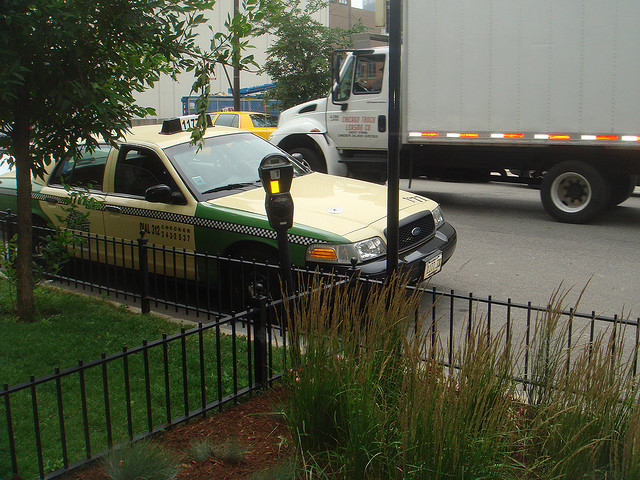

Our caption: 
The first time I saw the new version of the game, I was so excited. I


In [24]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000001.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000019.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000128.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003072.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003324.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003720.jpg")

In [ ]:
from torch.utils.data import Dataset

class CustomFSCOCODataset(Dataset):
    def __init__(self, captions_data, images_folder):
        self.captions_data = captions_data
        self.images_folder = images_folder

    def __len__(self):
        return len(self.captions_data)

    def __getitem__(self, idx):
        image_filename = self.captions_data[idx]["image_id"]
        image_path = os.path.join(self.images_folder, image_filename)
        image = Image.open(image_path)

        captions = [caption["caption"] for caption in self.captions_data[idx]["captions"]]

        return image, captions
    
from PIL import Image

images_folder = r"C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoSyn"
caption_folder = r'C:\Users\Asus\Documents\Surrey\Research Project\CodeAnalysis\Caption Generation\a-PyTorch-Tutorial-to-Image-Captioning-master\a-PyTorch-Tutorial-to-Image-Captioning-master\fscoco\FSCOCO_1\FscocoCaptions'
image_path = os.path.join(images_folder, "image_filename.jpg")
image = Image.open(image_path)
train_dataset,  = CustomCOCODataset(captions_data, images_folder)

In [ ]:
for batch in tqdm(train_loader, "Training", total=len(train_loader), leave=False):
            pixel_train_Ls, target_train_Ls  = preprocess_transform(batch)

            for iTrain in range(len(pixel_train_Ls)):
                #print(current_step, save_steps, current_step % save_steps)
                if current_step % save_steps == 0:
                    ### = code ###
                    # evaluate on the validation set
                    print("Validation at step:", current_step_count)
                    # if the current step is a multiple of the save steps
                    #print(f"\nValidation at step {current_step}...\n")
                    # set the model to evaluation mode
                    model.eval()
                    # initialize our lists that store the predictions and the labels
                    predictions, labels = [], []
                    # initialize the validation loss
                    valid_loss = 0
                    
                    for batchval in val_loader:
                        pixel_val_Ls, target_val_Ls  = preprocess_transform(batchval)
                        # get the batch
                        for iVal in range(len(pixel_val_Ls)):
                            pixel_values = pixel_val_Ls[iVal]
                            label_ids = target_val_Ls[iVal]
                            # forward pass
                            outputs = model(pixel_values=pixel_values, labels=label_ids)
                            # get the loss
                            loss = outputs.loss
                            valid_loss += loss.item()
                            # free the GPU memory
                            logits = outputs.logits.detach().cpu()
                            # add the predictions to the list
                            predictions.extend(logits.argmax(dim=-1).tolist())
                            # add the labels to the list
                            labels.extend(label_ids.tolist())
                        
                    # make the EvalPrediction object that the compute_metrics function expects
                    eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
                    # compute the metrics
                    metrics = compute_metrics(eval_prediction)
                    # print the stats
                    print(f"\nEpoch: {epoch}, Step: {current_step}, Train Loss: {train_loss / save_steps:.4f}, " + 
                        f"Valid Loss: {valid_loss / n_valid_steps:.4f}, BLEU: {metrics['bleu']:.4f}, " + 
                        f"ROUGE-1: {metrics['rouge1']:.4f}, ROUGE-2: {metrics['rouge2']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}\n")
                    # log the metrics

                    recent_bleu = metrics['bleu']
                    is_best = recent_bleu > best_bleu
                    best_bleu = max(recent_bleu, best_bleu)

                    summary_writer.add_scalar("valid_loss", valid_loss / n_valid_steps, global_step=current_step)
                    summary_writer.add_scalar("bleu", metrics["bleu"], global_step=current_step)
                    summary_writer.add_scalar("rouge1", metrics["rouge1"], global_step=current_step)
                    summary_writer.add_scalar("rouge2", metrics["rouge2"], global_step=current_step)
                    summary_writer.add_scalar("rougeL", metrics["rougeL"], global_step=current_step)
                    # save the model
                    if is_best:
                        best_checkpoint = current_step_count
                        model.save_pretrained(f"./image-captioning/checkpoint-{current_step_count}")
                        tokenizer.save_pretrained(f"./image-captioning/checkpoint-{current_step_count}")
                        image_processor.save_pretrained(f"./image-captioning/checkpoint-{current_step_count}")
                        save_checkpoint(data_name, epoch, 0, encoder_model, decoder_model, optimizer, optimizer, recent_bleu, is_best, data_folder)
                    # get the model back to train mode
                    model.train()
                    # reset the train and valid loss
                    train_loss, valid_loss = 0, 0
                ### training code below ###
                # get the batch & convert to tensor
                pixel_values = pixel_train_Ls[iTrain]
                labels = target_train_Ls[iTrain]
                # forward pass
                outputs = model(pixel_values=pixel_values, labels=labels)
                # get the loss
                loss = outputs.loss
                # backward pass
                loss.backward()
                # update the weights
                optimizer.step()
                # zero the gradients
                optimizer.zero_grad()
                # log the loss
                loss_v = loss.item()
                train_loss += loss_v
                # increment the step
                current_step_count += 1
                current_step += 10
                # log the training loss
                summary_writer.add_scalar("train_loss", loss_v, global_step=current_step)
                iTrain += 1